# Ex03 - Filtragem de Imagens - Gabarito

Nesta atividade vamos entender a operação de convolução e o uso da mesma para filtragem de imagens. Testaremos o uso de **filtros suavizantes**, usados para a remoção de ruído, e **filtros aguçantes**, usados para detecção de bordas.  

- **Filtros suavizantes:** são aqueles que removem a nitidez da imagem fazendo uma média, aritmética ou ponderada, na janela do núcleo. O filtro ponderado suavizante mais comum é o da gaussiana. Filtros suavizantes são muito utilizados para eliminar ruído de uma imagem.

- **Filtros aguçantes:** são aqueles que realçam as bordas da imagem. Alguns dos filtros aguçantes comuns são: Filtro de Sobel, Filtro de Prewitt, Filtro Laplaciano.

Veja mais no notebook sobre [Filtragem no domínio espacial](07_Filtragem_no_dominio_espacial.ipynb)

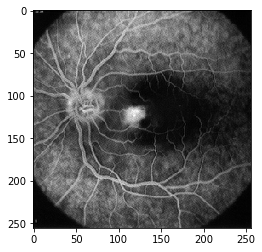

In [1]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import skimage.filters as skf

%matplotlib inline
f = mpimg.imread('../data/retina.tif')  
plt.imshow(f,cmap='gray')

**ATENÇÃO** - as operações de filtragem alteram os valores e eles podem sair da faixa de 0 a 255. Portanto, fique atento à maneira como você está realizando as operações e visualizando os resultados. Algumas dicas:

- Uma boa prática é realizar as operações em ponto flutuante;
- Quando a visualização não corresponde ao esperado, desconfie que os valores sairam da escala e que os valores, de alguma maneira, estão sendo truncados;

### Exercício 1 - Operação de convolução e filtro da média

Entenda o uso da operação de convolução e experimente usá-la para entender o filtro da média. Siga o seguinte roteiro:
- crie uma imagem numérica pequena (7x7, por exemplo), crie um filtro de média (máscara 3x3) e use a função da bilbioteca Skimage (skimage.filter.edges.convolve) para realizar a filtragem. Você precisará importar a biblioteca usando *import skimage*,mas não é preciso instalar nada. Verifique numericamente que a filtragem esteja correta;
- repita a operação de filtragem com a mesma máscara da média e a de convolução na imagem da retina;
- faça experimentos variando o tamanho da máscara do filtro e compare as imagens resultantes;
- varie também o modos da função - 'reflect','constant','nearest','mirror','wrap'- explicando as diferenças encontradas. Dica, você só conseguirá visualizar as diferenças se aumentar o tamanho da máscara (filtro);

Primeiro, criamos uma imagem numérica 7x7 com valores entre 0 e 9

In [2]:
#a = np.random.randint(10, size=(7,7))
a = 9*np.ones((7,7))
a[1,4] = 0
print(a)

[[ 9.  9.  9.  9.  9.  9.  9.]
 [ 9.  9.  9.  9.  0.  9.  9.]
 [ 9.  9.  9.  9.  9.  9.  9.]
 [ 9.  9.  9.  9.  9.  9.  9.]
 [ 9.  9.  9.  9.  9.  9.  9.]
 [ 9.  9.  9.  9.  9.  9.  9.]
 [ 9.  9.  9.  9.  9.  9.  9.]]


Agora, criaremos um filtro de média 3x3

In [3]:
h = 1/9*(np.ones((3,3)))
print(h)

[[ 0.11111111  0.11111111  0.11111111]
 [ 0.11111111  0.11111111  0.11111111]
 [ 0.11111111  0.11111111  0.11111111]]


In [4]:
# Podemos aqui já testar os diferentes tipos de tratamento de borda
# a_filt = skf.edges.convolve(a,h)
a_filt = skf.edges.convolve(a,h,mode='constant',cval=0)
# a_filt = skf.edges.convolve(a,h,mode='nearest')
print(a_filt)

[[ 4.  6.  6.  5.  5.  5.  4.]
 [ 6.  9.  9.  8.  8.  8.  6.]
 [ 6.  9.  9.  8.  8.  8.  6.]
 [ 6.  9.  9.  9.  9.  9.  6.]
 [ 6.  9.  9.  9.  9.  9.  6.]
 [ 6.  9.  9.  9.  9.  9.  6.]
 [ 4.  6.  6.  6.  6.  6.  4.]]


Agora vamos realizar a mesma operação de filtragem pela média, mas usando a imagem da retina. Vamos também usar máscaras de média de tamanhos diferentes.

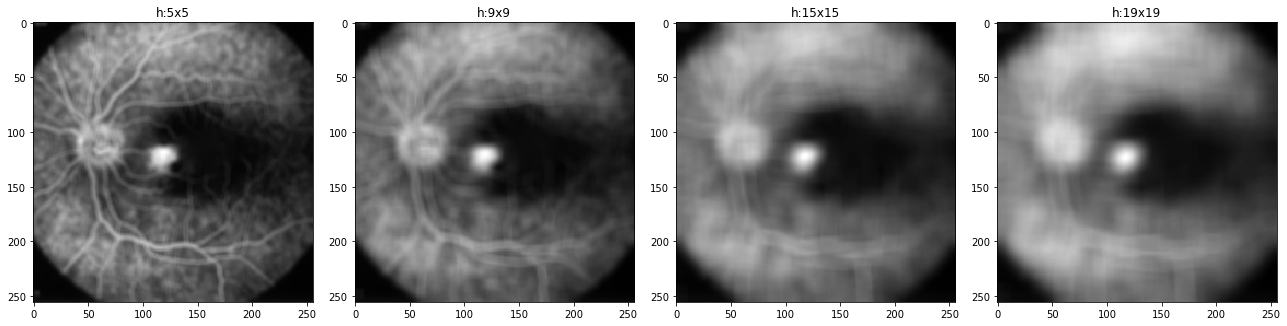

In [43]:
# Criando máscaras da média de diversos tamanhos
H1 = (1/(5*5))*(np.ones((5,5)))
H2 = (1/(9*9))*(np.ones((9,9)))
H3 = (1/(15*15))*(np.ones((15,15)))
H4 = (1/(19*19))*(np.ones((19,19)))

# Filtrando as imagens com as diversas máscara
f_filt_H1 = skf.edges.convolve(f,H1)
f_filt_H2 = skf.edges.convolve(f,H2)
f_filt_H3 = skf.edges.convolve(f,H3)
f_filt_H4 = skf.edges.convolve(f,H4)


fig, axs = plt.subplots(1,4, figsize=(18, 10))
plt.tight_layout() 

plt.subplot(141)
plt.imshow(f_filt_H1, cmap='gray')
plt.title('h:5x5')
plt.subplot(142)
plt.imshow(f_filt_H2, cmap='gray')
plt.title('h:9x9')
plt.subplot(143)
plt.imshow(f_filt_H3, cmap='gray')
plt.title('h:15x15')
plt.subplot(144)
plt.imshow(f_filt_H4, cmap='gray')
plt.title('h:19x19')

À medida que a máscara aumenta, percebe-se que o borramento também. Enquanto que com filtragem da máscara 5x5 ainda se vê todos os vasos da retina, com filtragem da máscara 19x19, praticamente só se vê a pupila. Este tipo de filtragem com uma máscara tão grande, pode ser útil, por exemplo, para nos livrarmos dos vasos, se estamos apenas interessados na pupila.

A partir da máscara 5x5 Agora vamos comparar os modos de tratamento de borda da função de convolução, usando 2 máscaras de média, uma pequena (3x3) e uma maior (21x21).

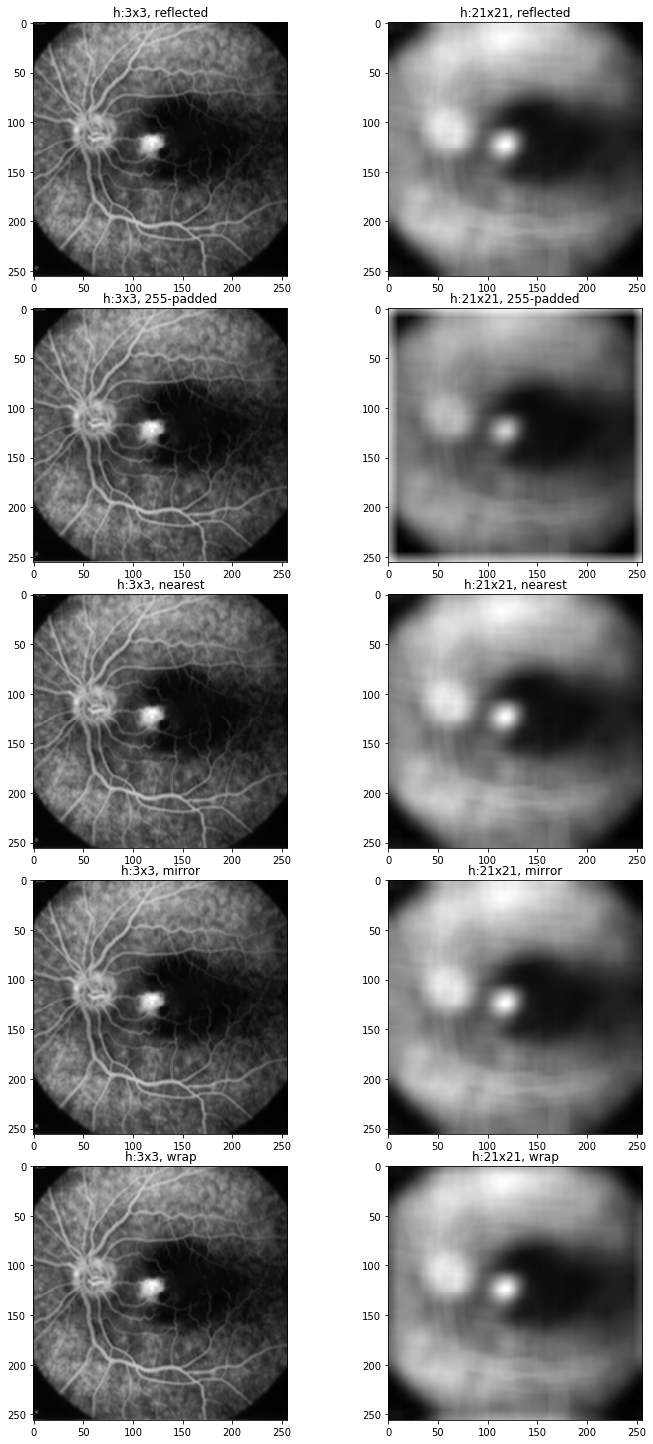

In [44]:
# Criando uma máscara da média de tamanho 21x21
h2 = (1/(21*21))*(np.ones((21,21)))

# Filtrando as imagens com a máscara 3x3, variando o tratamento de borda
f_filt = skf.edges.convolve(f,h)
f_filt2 = skf.edges.convolve(f,h,mode='constant',cval=255)
f_filt3 = skf.edges.convolve(f,h,mode='nearest')
f_filt4 = skf.edges.convolve(f,h,mode='mirror')
f_filt5 = skf.edges.convolve(f,h,mode='wrap')

# Filtrando as imagens com a máscara 21x21, variando o tratamento de borda
f_filt6 = skf.edges.convolve(f,h2)
f_filt7 = skf.edges.convolve(f,h2,mode='constant',cval=255)
f_filt8 = skf.edges.convolve(f,h2,mode='nearest')
f_filt9 = skf.edges.convolve(f,h2,mode='mirror')
f_filt10 = skf.edges.convolve(f,h2,mode='wrap')

fig, axs = plt.subplots(5,2, figsize=(10, 20))
plt.tight_layout() 

plt.subplot(521)
plt.imshow(f_filt, cmap='gray')
plt.title('h:3x3, reflected')
plt.subplot(523)
plt.imshow(f_filt2, cmap='gray')
plt.title('h:3x3, 255-padded')
plt.subplot(525)
plt.imshow(f_filt3, cmap='gray')
plt.title('h:3x3, nearest')
plt.subplot(527)
plt.imshow(f_filt4, cmap='gray')
plt.title('h:3x3, mirror')
plt.subplot(529)
plt.imshow(f_filt5, cmap='gray')
plt.title('h:3x3, wrap')

plt.subplot(522)
plt.imshow(f_filt6,cmap='gray')
plt.title('h:21x21, reflected')
plt.subplot(524)
plt.imshow(f_filt7,cmap='gray')
plt.title('h:21x21, 255-padded')
plt.subplot(526)
plt.imshow(f_filt8, cmap='gray')
plt.title('h:21x21, nearest')
plt.subplot(528)
plt.imshow(f_filt9, cmap='gray')
plt.title('h:21x21, mirror')
plt.subplot(5,2,10)
plt.imshow(f_filt10, cmap='gray')
plt.title('h:21x21, wrap')

Algumas observações sobre os modos de tratamento de bordas:
1. usando filtros pequenos, não se percebe o efeito de bordas
2. os modos *reflect*, *mirror* e *nearest* não causam efeito de borda perceptível, mesmo usando máscaras grandes
3. os modos *constant* e *wrap* resultam em um efeito de borda mais perceptível.

### Exercício 2 - Filtro gaussiano e redução de ruído

Explore o filtro Gaussiano. Sugestões:
- teste a propriedade de decomposição das máscaras da convolução, ou seja, crie um filtro gaussiano bi-dimensional (3,3) a partir de 2 filtros unidimensionais (3,1) e (1,3);
- adicione ruído gaussiano à imagem da retina (sugestão: use np.random) e depois tente remover o ruído com o filtro gaussiano. Você pode aumentar o filtro gaussiano se quiser. Comente seu resultado. 

Gerando a Gaussiana 1D (horizontal)

In [47]:
x = np.array([-1, 0, 1])
sigma= 1.0
mu = 0.0
gh = np.exp(-( (x-mu)**2 / ( 2.0 * sigma**2 ) ) )
print("1D Gaussian-like array:")
print(gh)

1D Gaussian-like array:
[ 0.60653066  1.          0.60653066]


Gerando a Gaussiana 1D (vertical)

In [49]:
y = np.array([[-1],[0],[1]])
sigma= 1.0
mu = 0.0
gv = np.exp(-( (y-mu)**2 / ( 2.0 * sigma**2 ) ) )
print("1D Gaussian-like array:")
print(gv)

1D Gaussian-like array:
[[ 0.60653066]
 [ 1.        ]
 [ 0.60653066]]


Gerando a Gaussiana 2D pela multiplicação das máscaras horizontal e vertical

In [51]:
g = gv*gh
print(g)

[[ 0.36787944  0.60653066  0.36787944]
 [ 0.60653066  1.          0.60653066]
 [ 0.36787944  0.60653066  0.36787944]]


Gerando a Gaussaiana 2D diretamente, para poder comparar.

In [52]:
x, y = np.meshgrid(np.linspace(-1,1,3), np.linspace(-1,1,3))
d = np.sqrt(x*x+y*y)
sigma, mu = 1.0, 0.0
g = np.exp(-( (d-mu)**2 / ( 2.0 * sigma**2 ) ) )
print("2D Gaussian-like array:")
print(g)

2D Gaussian-like array:
[[ 0.36787944  0.60653066  0.36787944]
 [ 0.60653066  1.          0.60653066]
 [ 0.36787944  0.60653066  0.36787944]]


Adicionando ruído à imagem usando a função *np.random.random*

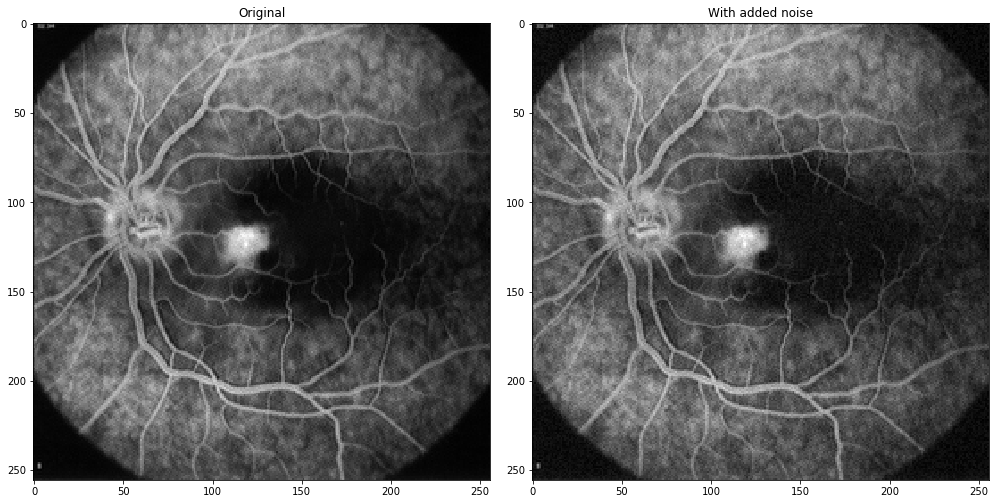

In [55]:
noisy = f + 0.4 * f.std() * np.random.random(f.shape)

fig, axs = plt.subplots(1,2, figsize=(14, 8))
plt.tight_layout() 

plt.subplot(121)
plt.imshow(f, cmap='gray')
plt.title('Original')
plt.subplot(122)
plt.imshow(noisy,cmap='gray')
plt.title('With added noise')

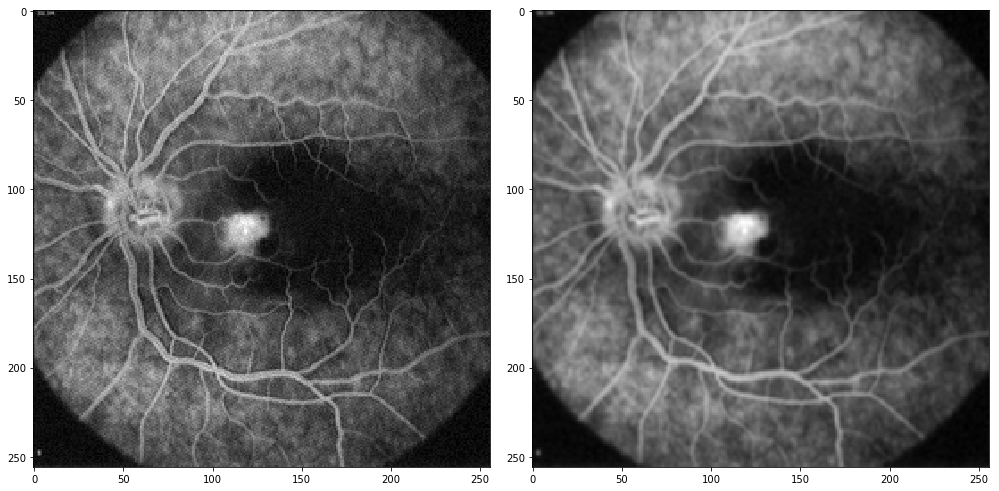

In [56]:
# normalizando o filtro gaussiano
gnorm = 1/sum(sum(g))*g

# filtrando a imagem ruidosa com o filtro gaussiano 2D
f_no_noise = skf.edges.convolve(noisy,gnorm)
fig, axs = plt.subplots(1,2, figsize=(14, 8))
plt.tight_layout() 

plt.subplot(121)
plt.imshow(noisy, cmap='gray')
plt.subplot(122)
plt.imshow(f_no_noise,cmap='gray')

É possível ver que o filtro consegue remover parte do ruído, mas que também acaba borrando um pouco a imagem.

### Exercício 3 - Filtro de Sobel e detecção de bordas

Existem vários filtros que procuram realçar as bordas da imagem. Um dos mais conhecidos é o Operador Sobel, composto por uma máscara vertical (Sv) e uma máscara horizontal (Sh).

In [57]:
import numpy as np

Sv = np.array([[1,0,-1],[2,0,-2],[1,0,-1]])
print('Sv =\n',Sv)

Sh = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
print('Sh =\n',Sh)

Sv =
 [[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]]
Sh =
 [[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]]


### 3.1 Visualizando as bordas verticais e horizontais em 2 imagens separadas

Para detectar bordas de uma imagem usando o Filtro de Sobel, precisamos fazer a filtragem da imagem usando tanto a máscara vertical, quanto a horizontal. No final, acabaremos com 2 imagens resultantes, cada uma reforçando as bordas verticais e horizontais, respectivamente. Experimente filtrar a imagem da retina com os Filtros de Sobel vertical e horizontal e visualize o resultado. Você deve obter uma imagem fitrada pelo Filtro de Sobel vertical - fv - e uma imagem filtrada pelo Filtro de Sobel horizontal - fh.

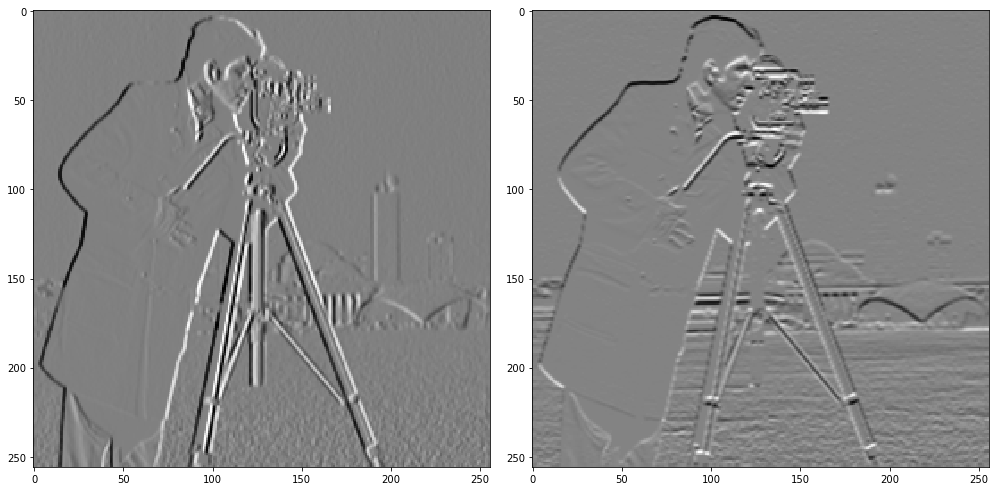

In [59]:
# Filtrando a imagem f pelos filtros vertical e horizontal de Sobel
f = mpimg.imread('../data/cameraman.tif')
f1 = f.astype(float)
fv = skf.edges.convolve(f1,Sv)
fh = skf.edges.convolve(f1,Sh)

fig, axs = plt.subplots(1,2, figsize=(14, 8))
plt.tight_layout() 

plt.subplot(121)
plt.imshow(fv, cmap='gray')
plt.subplot(122)
plt.imshow(fh,cmap='gray')

A imagem aparece cinza, porque há bordas positivas e negativas. Para ver todas as bordas positivas, é preciso fazer o absoluto da imagem.

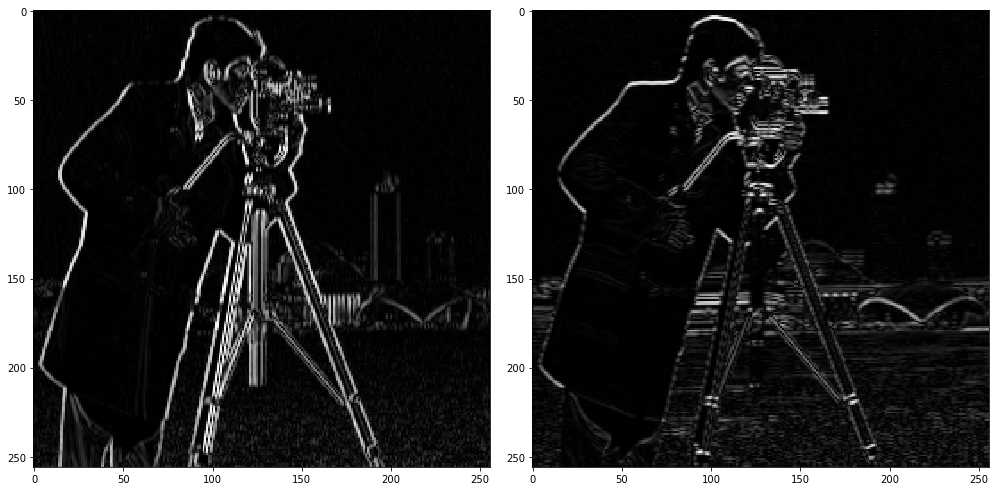

In [62]:
fvv = np.abs(fv)
fhh = np.abs(fh)

fig, axs = plt.subplots(1,2, figsize=(14, 8))
plt.tight_layout() 

plt.subplot(121)
plt.imshow(fvv, cmap='gray')
plt.subplot(122)
plt.imshow(fhh,cmap='gray')

### 3.2 Visualizando todas as bordas em uma única imagem

Para visualizar o resultado das 2 filtragens em uma única imagem, utilizamos a magnitude de Sobel. A função MagSobel a ser implementada possui como parâmetro a imagem de entrada e deve seguir a seguinte equação:

$$MagSobel = \sqrt{f_h^2 + f_v^2}$$

onde $f_h$ é a imagem de entrada convolvida com o operador de Sobel horizontal e $f_v$ é a imagem de entrada convolvida com o operador de Sobel vertical. Crie esta função e visualize a Magnitude Sobel das imagens geradas no item 3.1 (fv e fh).

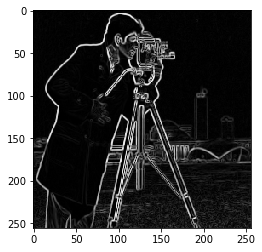

In [182]:
MagSobel = np.sqrt(fvv*fvv+fhh*fhh)
plt.imshow(MagSobel,cmap='gray')